# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [1]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [2]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [3]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [4]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [5]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [6]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,10.7,99,1.0
1,2023-01-01T01:00,10.5,99,1.0
2,2023-01-01T02:00,10.4,98,0.1
3,2023-01-01T03:00,10.3,96,0.0
4,2023-01-01T04:00,9.7,95,0.0


In [7]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [8]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill
# df.fillna(method='ffill', inplace=True) -- new version

C:\Users\WEYAN52\AppData\Local\Temp\ipykernel_49924\1706877659.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [9]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.371429,86.422619,0.142857
std,3.495063,12.799933,0.436037
min,0.400000,45.000000,0.000000
25%,5.900000,81.000000,0.000000
50%,8.250000,90.500000,0.000000
75%,11.100000,97.000000,0.000000
max,17.900000,100.000000,3.100000


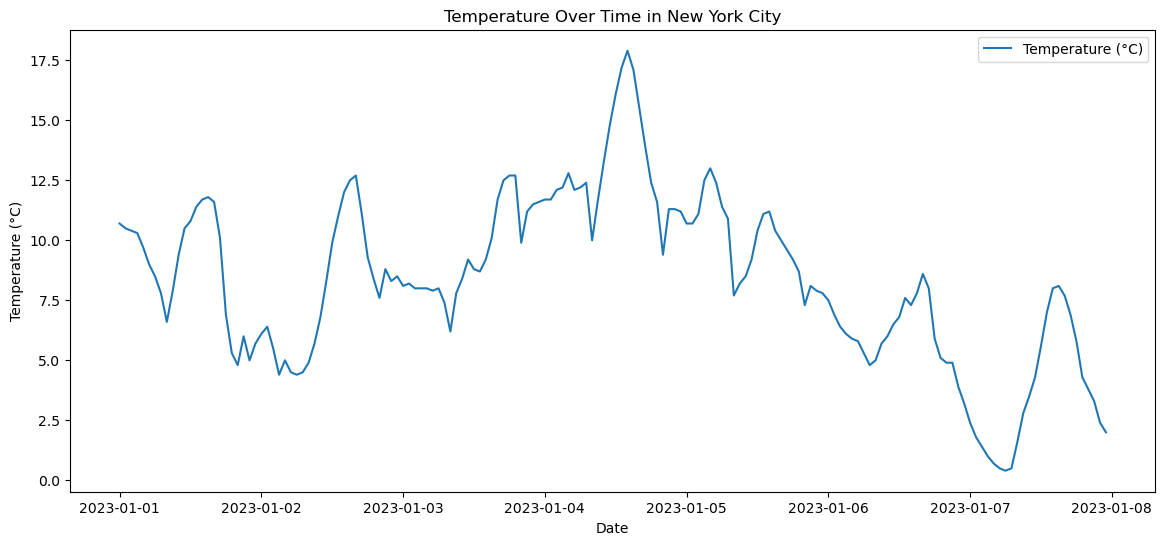

In [10]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

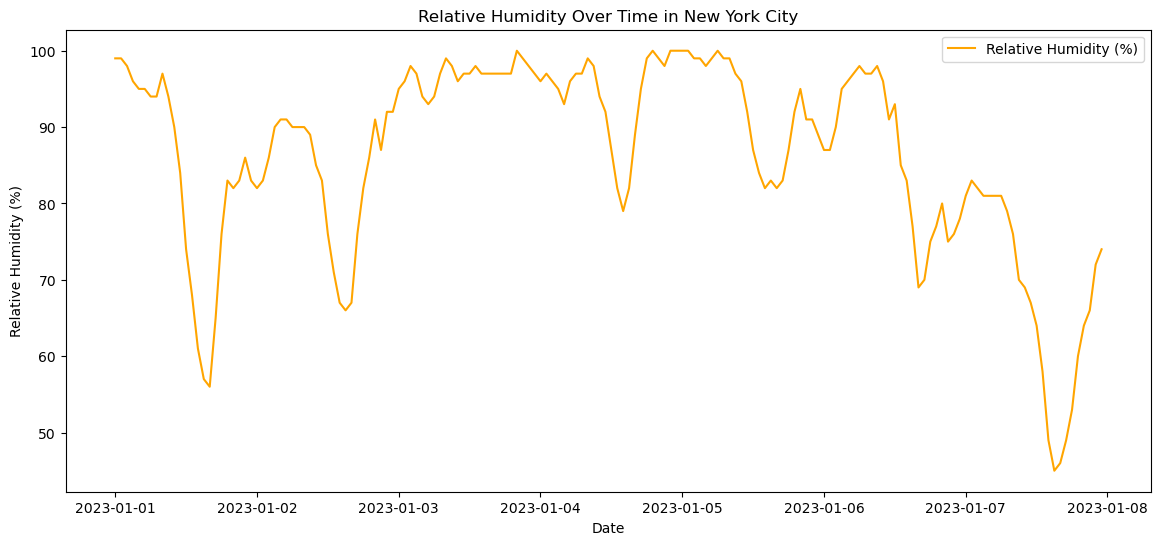

In [11]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


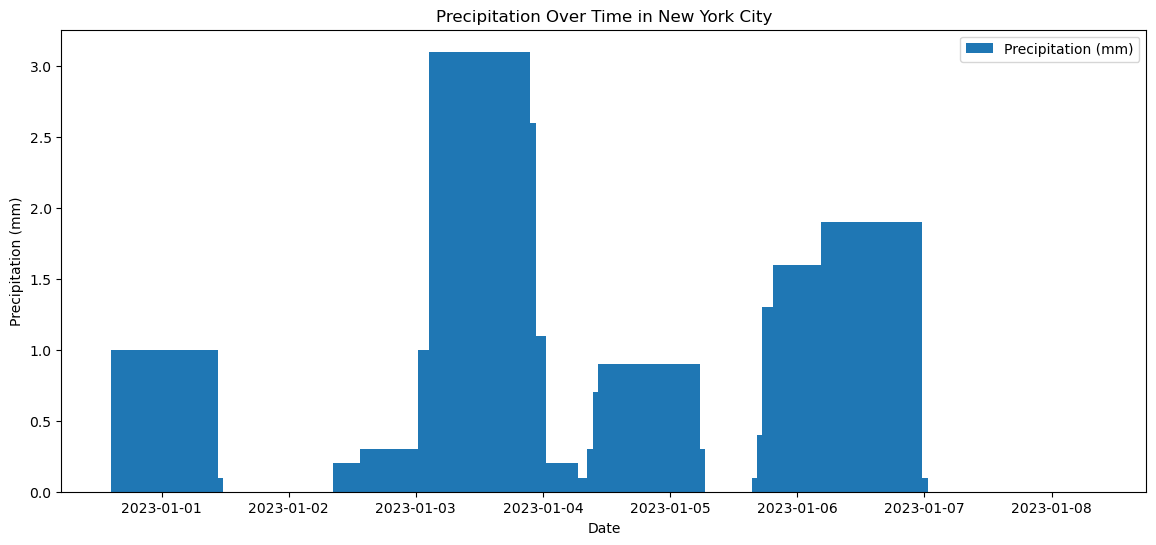

In [12]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [13]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.24


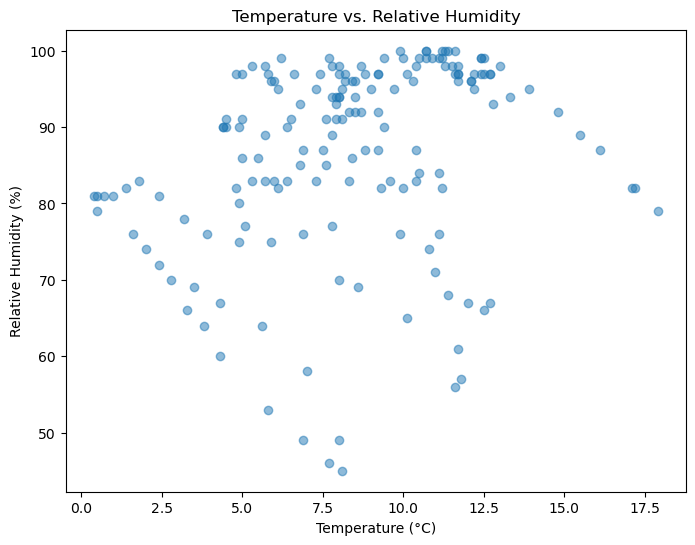

In [14]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [15]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,8.850000,83.708333,0.087500
2023-01-02,7.775000,83.458333,0.020833
2023-01-03,9.408333,96.875000,0.395833
2023-01-04,12.995833,94.166667,0.095833
2023-01-05,9.916667,92.666667,0.000000


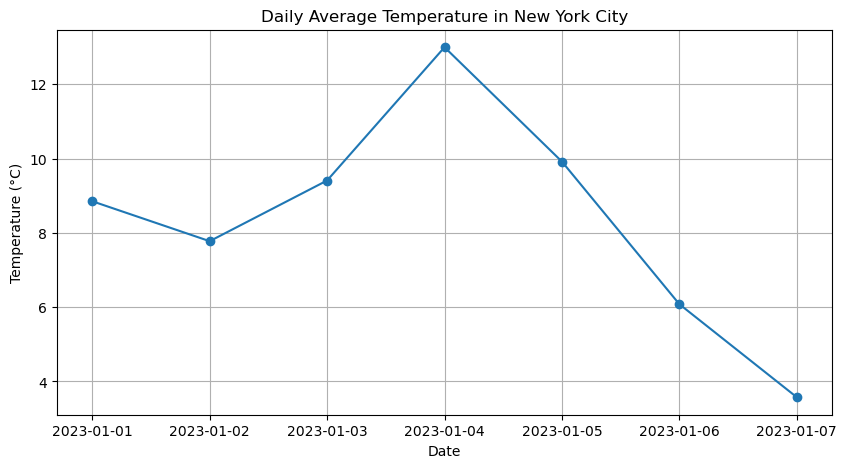

In [16]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [17]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.fillna(method='ffill', inplace=True)


C:\Users\WEYAN52\AppData\Local\Temp\ipykernel_49924\4259999984.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_la.fillna(method='ffill', inplace=True)


In [18]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [19]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


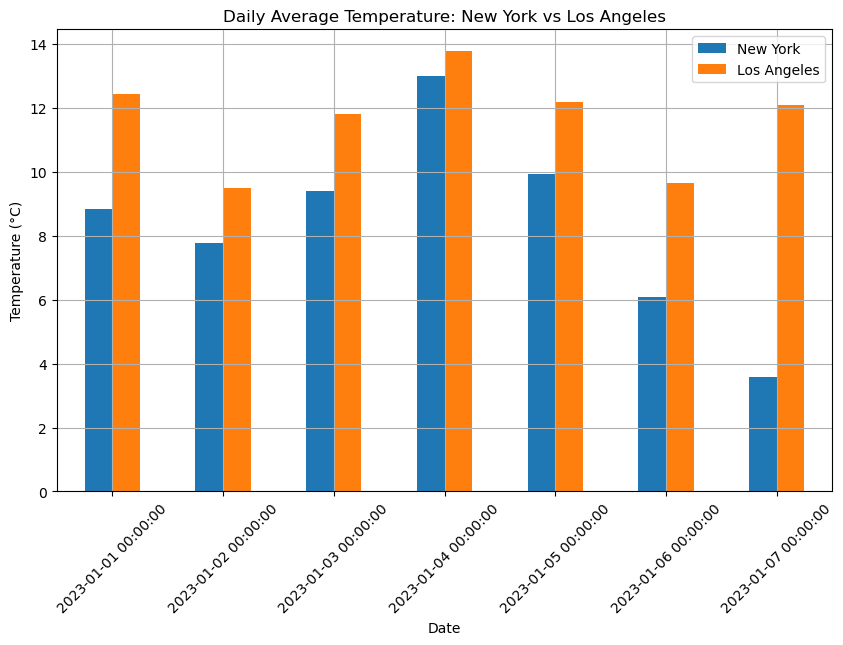

In [20]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [21]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.850000,12.433333,3.583333
2023-01-02,7.775000,9.483333,1.708333
2023-01-03,9.408333,11.808333,2.400000
2023-01-04,12.995833,13.766667,0.770833
2023-01-05,9.916667,12.183333,2.266667
2023-01-06,6.079167,9.662500,3.583333
2023-01-07,3.575000,12.095833,8.520833


In [22]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


In [23]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# London and Seattle coordinates
latitude_london, longitude_london = 51.5074, -0.1278
latitude_seattle, longitude_seattle = 47.6062, -122.3321

# Date range for 2022
start_date = '2022-01-01'
end_date = '2022-12-31'

# Variable to fetch
hourly_variable = ['precipitation']

# API endpoint
base_url = "https://archive-api.open-meteo.com/v1/archive"

In [25]:
# Check if the request was successful
if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')

Data fetched successfully!


In [26]:
# London parameters
params_london = {
    "latitude": latitude_london,
    "longitude": longitude_london,
    "start_date": start_date,
    "end_date": end_date,
    "hourly": ",".join(hourly_variable),
    "timezone": "Europe/London"
}

# Seattle parameters
params_seattle = {
    "latitude": latitude_seattle,
    "longitude": longitude_seattle,
    "start_date": start_date,
    "end_date": end_date,
    "hourly": ",".join(hourly_variable),
    "timezone": "America/Los_Angeles"
}

# London request
response_london = requests.get(base_url, params = params_london)
data_london = response_london.json()

# Seattle request
response_seattle = requests.get(base_url, params=params_seattle)
data_seattle = response_seattle.json()

In [27]:
# Load into Dataframes
# London data
df_london = pd.DataFrame(data_london['hourly'])
df_london['time'] = pd.to_datetime(df_london['time'])
df_london.set_index('time', inplace=True)

df_london.head()


,precipitation
time,
2022-01-01 00:00:00,0.0
2022-01-01 01:00:00,0.0
2022-01-01 02:00:00,0.0
2022-01-01 03:00:00,0.0
2022-01-01 04:00:00,0.0


In [28]:
# Load into Dataframes
# Seattle data
df_seattle = pd.DataFrame(data_seattle['hourly'])
df_seattle['time'] = pd.to_datetime(df_seattle['time'])
df_seattle.set_index('time', inplace=True)

df_seattle.head()

,precipitation
time,
2022-01-01 00:00:00,0.0
2022-01-01 01:00:00,0.0
2022-01-01 02:00:00,0.0
2022-01-01 03:00:00,0.0
2022-01-01 04:00:00,0.0


In [29]:
print(df_london.isnull().sum())
print(df_seattle.isnull().sum())

precipitation    0
dtype: int64
precipitation    0
dtype: int64


In [30]:
df_london.ffill(inplace=True)
df_seattle.ffill(inplace=True)

In [31]:
df_london.describe()

,precipitation
count,8760.000000
mean,0.075662
std,0.404500
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,14.700000


In [32]:
df_seattle.describe()

,precipitation
count,8760.000000
mean,0.129132
std,0.463708
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,7.700000


In [33]:
#Reasmple to weekly total for London
df_london_weekly = df_london.resample("W").sum()
df_london_weekly.head()

,precipitation
time,
2022-01-02,2.2
2022-01-09,12.9
2022-01-16,3.1
2022-01-23,0.0
2022-01-30,0.1


In [34]:
#Reasmple to weekly total for Seattle
df_seattle_weekly = df_seattle.resample("W").sum()
df_seattle_weekly.head()

,precipitation
time,
2022-01-02,31.3
2022-01-09,108.8
2022-01-16,45.5
2022-01-23,15.7
2022-01-30,6.1


In [35]:
# Combine two dataset
combined_rain = pd.DataFrame({
    'London': df_london_weekly['precipitation'],
    'Seattle': df_seattle_weekly['precipitation']
})

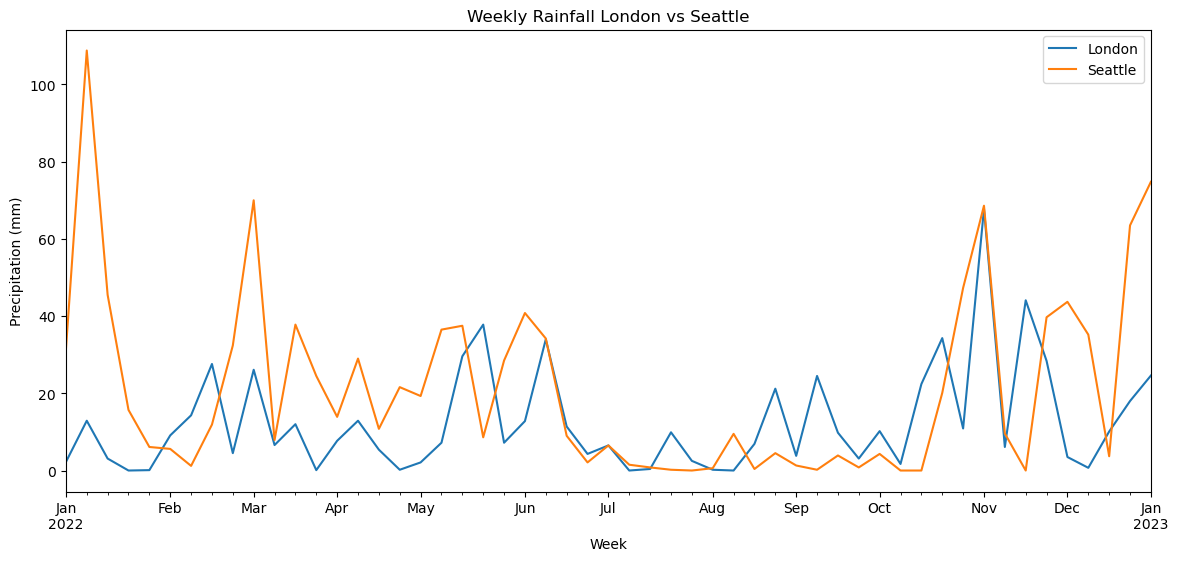

In [36]:
combined_rain.plot(figsize=(14,6))
plt.title('Weekly Rainfall London vs Seattle')
plt.xlabel('Week')
plt.ylabel('Precipitation (mm)')
plt.show()

In [37]:
#Total rainfall
print('Total rainfall of London in 2022 is: ', combined_rain['London'].sum(), 'mm')
print('Total rainfall of Seattle in 2022 is:', combined_rain['Seattle'].sum(), 'mm')

Total rainfall of London in 2022 is:  662.8000000000001 mm
Total rainfall of Seattle in 2022 is: 1131.2 mm


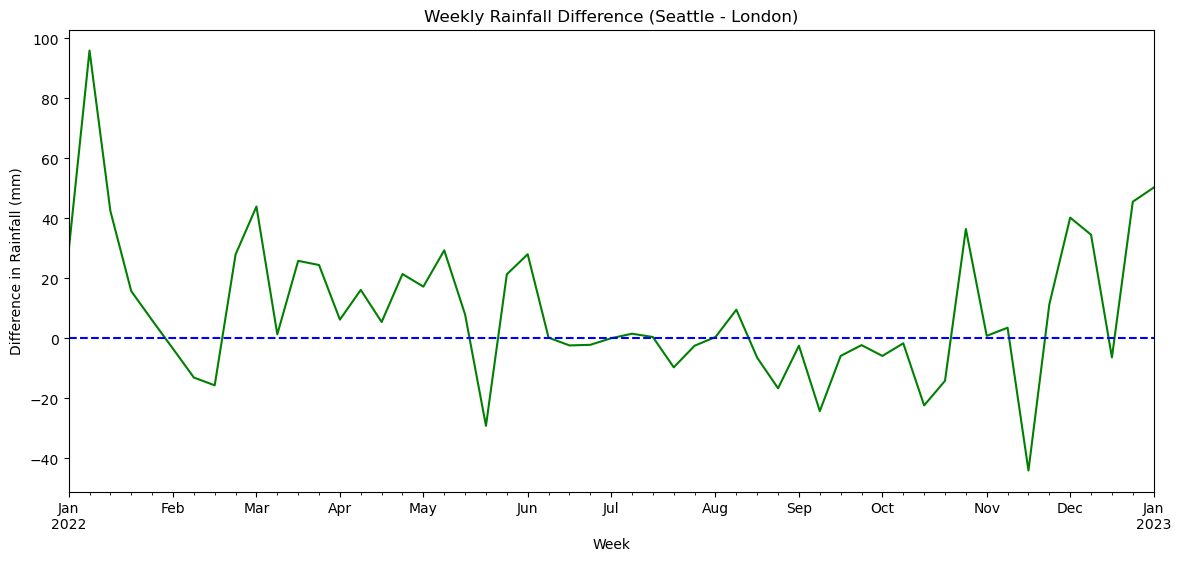

In [38]:
combined_rain["Difference"] = combined_rain["Seattle"] - combined_rain["London"]
# Plot weekly difference
combined_rain['Difference'].plot(figsize=(14,6), color='green')
plt.title("Weekly Rainfall Difference (Seattle - London)")
plt.xlabel("Week")
plt.ylabel("Difference in Rainfall (mm)")
plt.axhline(0, color='blue', linestyle='--')
plt.show()

In [39]:
# Correlation
corr = combined_rain['London'].corr(combined_rain['Seattle'])
print(f'Correlation of weekly rainfall between London and Seattle: {correlation:.2f}')

Correlation of weekly rainfall between London and Seattle: 0.24


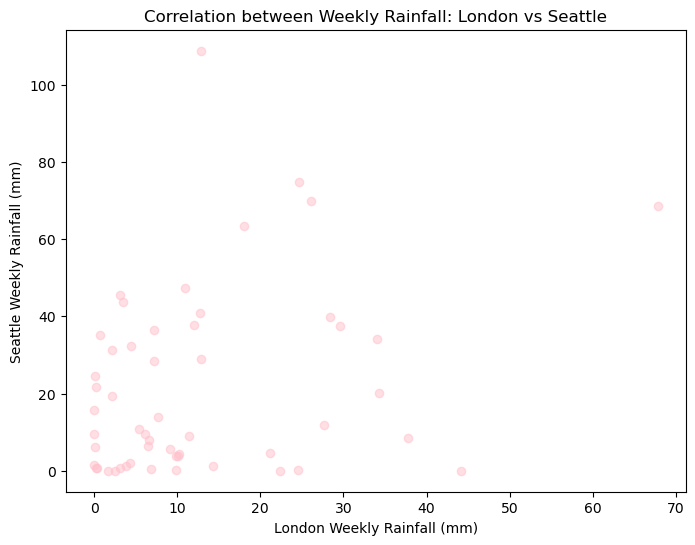

In [40]:
# Scatter plot to visualize correlation
plt.figure(figsize=(8,6))
plt.scatter(combined_rain['London'], combined_rain['Seattle'], alpha=0.5, color='pink')
plt.xlabel("London Weekly Rainfall (mm)")
plt.ylabel("Seattle Weekly Rainfall (mm)")
plt.title("Correlation between Weekly Rainfall: London vs Seattle")
plt.show()

In [41]:
# Save Data to CSV

# Save London data
df_london.to_csv("london_hourly_2022.csv")

# Save Seattle data
df_seattle.to_csv("seattle_hourly_2022.csv")

# Save combined weekly totals
combined_rain.to_csv("london_seattle_weekly_comparison_2022.csv")


#### Conclusion:
1. London recorded ~663 mm of rainfall in 2022, while Seattle reached ~1131 mm, making Seattle about 70% wetter overall.
2. Seattle’s rainfall showed strong spikes concentrated in certain months, whereas London’s rainfall was more evenly spread throughout 2022.
3. Seattle was consistently wetter in most weeks, while London only exceeded Seattle occasionally — and with a smaller gap.
4. The rainfall correlation of 0.24 shows that the two cities’ rainfall patterns were only weakly aligned.